In [35]:
hv_path = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/data'
dv_path = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/data/datos_con_sector.csv'

## librerías

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from scipy import stats

## carga del dataset

In [36]:
path = hv_path


In [44]:
df_sectores = pd.read_csv(f'{path}/sectores_datos.csv')

In [37]:
df = pd.read_csv(f'{path}/datos_con_sector.csv')

In [38]:
df.drop(columns=['Unnamed: 0'], inplace =True)

In [39]:
FILAS_P2 = df.shape[0]
FILAS_P2

104535

## limpieza

In [9]:
df.isna().sum()

id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                  3640
lon                  3640
l1                      0
l2                      0
l3                   2230
l4                  12026
l5                  60337
l6                  96410
rooms              101278
bedrooms            79900
bathrooms           13050
surface_total      104183
surface_covered    104286
price                 193
currency              225
price_period       104183
title                   0
description             4
property_type           0
operation_type          0
Nombre_sector           0
dtype: int64

In [11]:
sectores = ['Abel Gilbert', 'Acacias', 'Academia Logos', 'Alborada', 'Arcadia',
       'Argelia', 'Atahualpa', 'Atarazana', 'Balerio Estacio', 'Barrio Lindo',
       'Bastion Popular', 'Batallon del Suburbio', 'Belisario Quevedo',
       'Bellavista', 'Carcelen', 'Centro Historico', 'Cerro San Eduardo',
       'Cerro del Carmen', 'Chillogallo', 'Chimbacalle',
       'Ciudadela 9 de Octubre', 'Colinas de la Florida', 'Comite del Pueblo',
       'Condor', 'Cooperativa 5 de Diciembre', 'Cotocollao',
       'Cristo del Consuelo', 'El Fortin', 'El Inca', 'El Pintado', 'El Rio',
       'El condado', 'Estero Salado', 'Febres Cordero', 'Flor de Bastion',
       'Floresta', 'Florida', 'Garzota', 'Guamani', 'Guanguala',
       'Guasmo Norte - Rio Guayas', 'Guasmo Oeste', 'Guasmo Sur',
       'Guasmo Sur - La Union', 'Guayacanes', 'Huancavilca Norte',
       'Isla Trinitaria', 'Iñaquito', 'Juan Montalvo', 'La Ecuatoriana',
       'La Ferroviaria', 'La Luz', 'La Mena', 'La Paz', 'La Tola',
       'La Vicentina', 'Las Americas', 'Los Esteros',
       'Lotizacion Industrial Pascuales', 'Luz del Guayas', 'Mapasingue',
       'MarcoPamba', 'Mariscal Sucre', 'Monte Sinai', 'Mucho Lote',
       'Nueva Prosperina', 'Orquideas', 'Parroquia Garcia Moreno',
       'Parroquia Letamendi', 'Parroquia Sucre', 'Parroquia Urdaneta',
       'Pascuales', 'Ponceano', 'Pradera', 'Prosperina', 'Puerto Lisa',
       'Quitumbe', 'Rosales', 'Samanes', 'San Bartolo', 'San Carlos',
       'San Francisco', 'San Isidro del Inca', 'San Juan', 'Santa Anita',
       'Santa Isabel', 'Santa Maria de Cotocollao', 'Santa Rita', 'Sauces',
       'Sergio Toral', 'Solanda', 'TerraNostra', 'Turubamba', 'Urbanor',
       'Urdenor', 'Vergeles', 'Vista Sol']

In [40]:
idx = df['Nombre_sector'].isin(sectores)
df = df[idx]

In [41]:
FILAS_P3 = df.shape[0]
FILAS_P3

65748

In [17]:
FILAS_P2 - FILAS_P3

38787

In [18]:
df.isna().sum()

id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                 3640
lon                 3640
l1                     0
l2                     0
l3                  1113
l4                  4588
l5                 23537
l6                 57737
rooms              63945
bedrooms           49936
bathrooms           7791
surface_total      65486
surface_covered    65568
price                126
currency             151
price_period       65486
title                  0
description            4
property_type          0
operation_type         0
Nombre_sector          0
dtype: int64

### se eliminan columnas innecesarias

In [42]:
df.drop(columns=['title', 'description', 'ad_type', 'price_period', 'created_on', 'currency', 'l4', 'l5', 'l6'], inplace=True)

In [43]:
df.drop(columns=['lat', 'lon'], inplace=True)

In [48]:
ciudades = df_sectores[['Nombre_sector', 'Ciudad']]

In [71]:
ciudades = ciudades.append(pd.DataFrame({'Ciudad':['Quito', 'Guayaquil'], 'Nombre_sector':['La Luz', 'Guasmo Sur']})).reset_index(drop=True)

In [73]:
df = ciudades.merge(df)

In [74]:
df.drop(columns=['l1', 'l2', 'l3'], inplace=True)

### se eliminan repetidos

In [101]:
df.drop_duplicates(subset=['id'], inplace=True)

### análisis de outliers

In [81]:
df['operation_type'].unique()

array(['Venta', 'Alquiler', 'Alquiler temporal'], dtype=object)

In [102]:
idx = df['operation_type']=='Venta'
df_ventas = df[idx]
df_alquiler = df[~idx]

alquiler

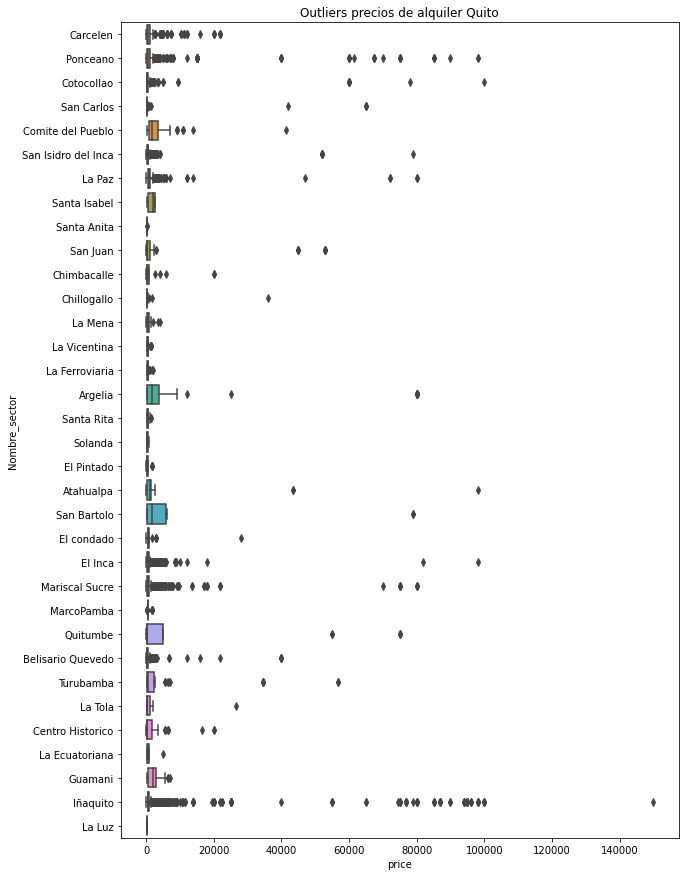

In [115]:
fig, ax = plt.subplots(figsize=(10,15))
_ = sns.boxplot(data=df_alquiler.loc[df_alquiler['Ciudad'] == 'Quito'], x='price', y='Nombre_sector', ax=ax)
_ = ax.set_title('Outliers precios de alquiler Quito')

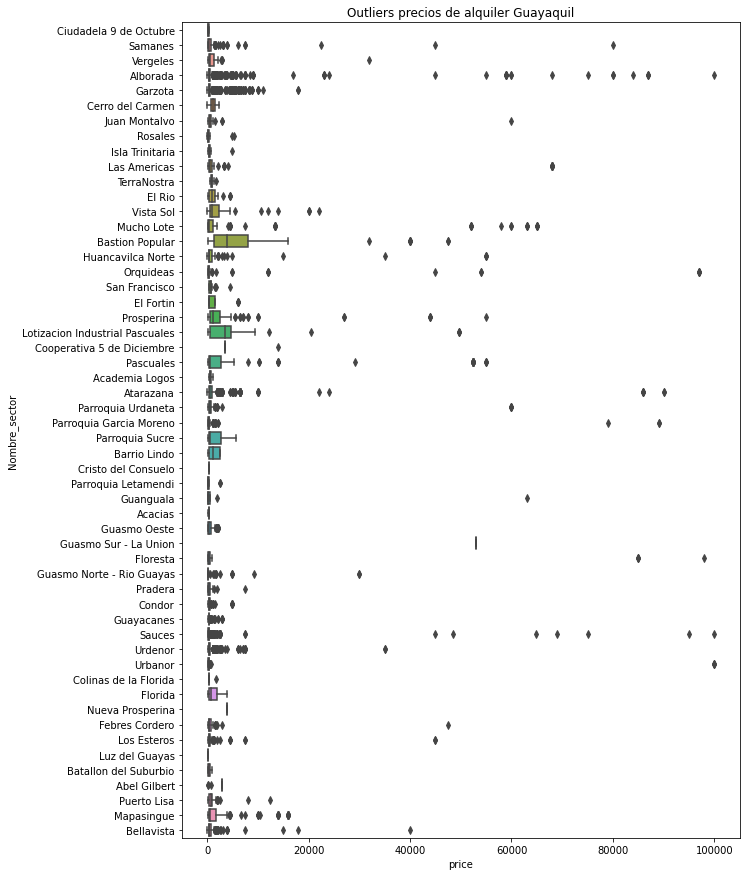

In [116]:
fig, ax = plt.subplots(figsize=(10,15))
_ = sns.boxplot(data=df_alquiler.loc[df_alquiler['Ciudad'] == 'Guayaquil'], x='price', y='Nombre_sector', ax=ax)
_ = ax.set_title('Outliers precios de alquiler Guayaquil')

In [118]:
mstd_alq = df_alquiler.groupby('Nombre_sector').agg({'price': [np.mean, np.std]})

In [121]:
mstd_alq.columns=['mean', 'std']

In [127]:
mstd_alq

,mean,std
Nombre_sector,,
Abel Gilbert,2674.583333,887.198714
Acacias,325.000000,84.013888
Academia Logos,661.666667,183.777373
Alborada,1316.822785,7036.579536
Argelia,10472.290698,24145.415139
...,...,...
Turubamba,5398.065574,12777.699893
Urbanor,3511.935484,17712.084198
Urdenor,816.858859,2145.297947


In [125]:
def zscore_alquiler(x):
  sector = x['Nombre_sector']
  mean = mstd_alq.loc[sector]['mean']
  std = mstd_alq.loc[sector]['std']
  zscore = (x['price']-mean)/std
  return zscore

In [128]:
zscore_alq = df_alquiler.apply(zscore_alquiler, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [140]:
idx = (zscore_alq > -3) & (zscore_alq < 3)

In [142]:
df_alquiler = df_alquiler[idx]

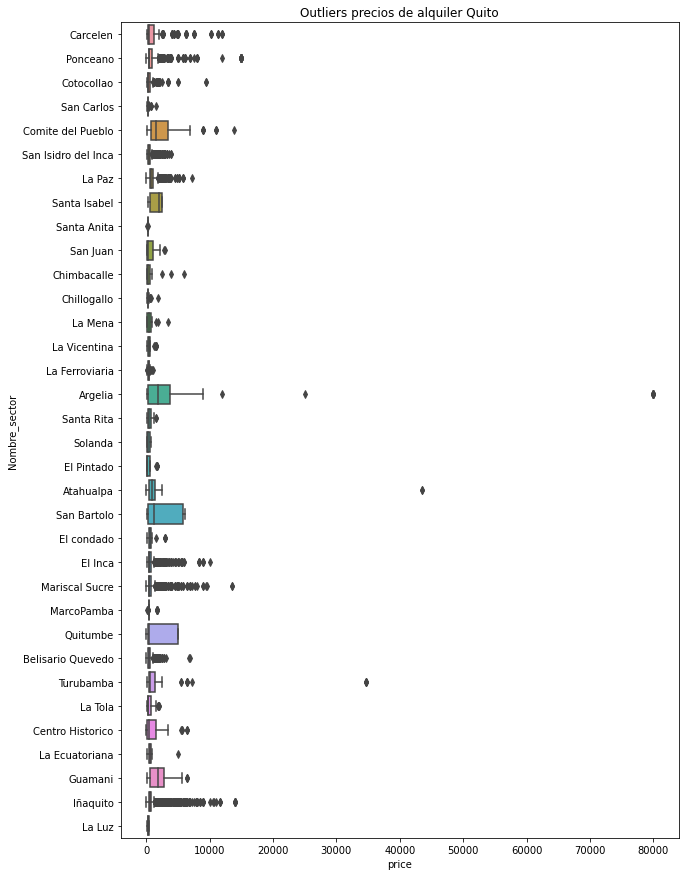

In [144]:
fig, ax = plt.subplots(figsize=(10,15))
_ = sns.boxplot(data=df_alquiler.loc[df_alquiler['Ciudad'] == 'Quito'], x='price', y='Nombre_sector', ax=ax)
_ = ax.set_title('Outliers precios de alquiler Quito')

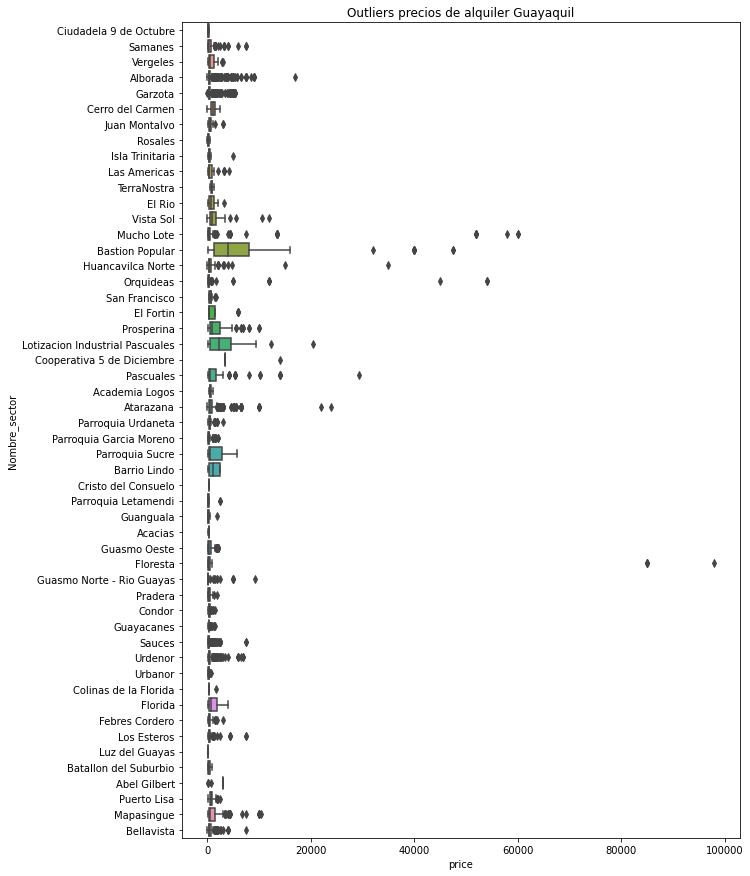

In [143]:
fig, ax = plt.subplots(figsize=(10,15))
_ = sns.boxplot(data=df_alquiler.loc[df_alquiler['Ciudad'] == 'Guayaquil'], x='price', y='Nombre_sector', ax=ax)
_ = ax.set_title('Outliers precios de alquiler Guayaquil')

In [145]:
print(f'quedan {df_alquiler.shape[0]} propiedades en alquiler luego de eliminar los outliers de precios')

quedan 32542 propiedades en alquiler luego de eliminar los outliers de precios


In [156]:
df_alquiler.notnull().sum()

Nombre_sector      32542
Ciudad             32542
id                 32542
start_date         32542
end_date           32542
rooms                539
bedrooms            7396
bathrooms          30262
surface_total        125
surface_covered      101
price              32542
property_type      32542
operation_type     32542
dtype: int64

In [162]:
sectores_areas_no_nulas = df.loc[df['surface_total'].notnull()].groupby('Nombre_sector')['id'].count()

In [163]:
sectores_areas_nulas = df.loc[df['surface_total'].isna()].groupby('Nombre_sector')['id'].count()

In [165]:
sectores_areas_no_nulas.to_csv('sectores_areas_no_nulas.csv')
sectores_areas_nulas.to_csv('sectores_areas_nulas.csv')